In [254]:
import numpy as np
import pandas as pd

## Progression

An important consideration when making a game is how quickly players will progress through the game. If your game is too easy, players may run out of levels too quickly or get bored. If your game is too hard players may get stuck making many attempts on a single level and get fed up and quit. Modelling the progression speed of players will help you understand how players experience the game.

In the following exercises we will simulate progression data for a fictional game. By the end of the exercises you will have written a function that simulates the progression of multiple players over multiple different levels.

### Exercise 1

The cell below will output 1 (win) or 0 (loss) for a single game round - you saw this function earlier. Edit the cell to define a function, called *progression*, that takes a variable *pass_rate* and outputs the result of the game round (1 or 0).

In [ ]:
np.random.binomial(1
                   , 0.6 #probability of success
                   , 1 #number of experiments
                  )

Test your code to make sure it's working as you expect.

In [ ]:
pass_rate = 0.6

progression(pass_rate)

In [256]:
#answer:

def progression(pass_rate):
    result = np.random.binomial(1, pass_rate, 1)
    return result[0]

progression(0.6)

0

### Exercise 2

The function you wrote is a good start, but knowing the result of a single game round isn't very useful in helping us understand how players progress through our game. Firstly, most players will play more than one game round in a session, so we need to edit the function to allow for multiple attempts. Your function should now take two variables, *pass_rate* and *num_game_rounds*, and the output of the function should be an array of 1s and 0s. Make sure you test your function to ensure it's working as you expect!

**Hint:** A for-loop could be useful here.

In [ ]:
def progression(pass_rate, num_game_rounds):
    # Your code here
    
    

In [230]:
#answer:

def progression(pass_rate, num_game_rounds):
    player_results = []
    for attempt in range(num_game_rounds):
        result = np.random.binomial(1, pass_rate, 1)
        player_results.extend(result)
    return player_results

progression(0.6, 10)

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]

### Exercise 3

In the previous function we used the same pass rate for each level, however in reality each level will have a different pass rate. Let's assume there are 10 levels in our game. The cell below will create a dataframe *levels_pass_rates* which tells us the pass rates for each level.

**Note:** The index of *levels_pass_rates* is the level number.

In [278]:
levels_pass_rates = pd.DataFrame(data={'level_pass_rate':[0.90,0.75,0.60,0.80,0.10,0.55,0.80,0.50,0.70,0.60]}
                                 , index=[1,2,3,4,5,6,7,8,9,10])
levels_pass_rates

,level_pass_rate
1,0.90
2,0.75
3,0.60
4,0.80
5,0.10
6,0.55
7,0.80
8,0.50
9,0.70
10,0.60


Edit your function so that, instead of taking a single number for *pass_rate*, it takes the dataframe *levels_pass_rates*.


**Hint:** A player will keep playing the same level until they win a game round on that level.

In [ ]:
def progression(pass_rate, num_game_rounds):
    # Your code here
    
    

In [ ]:
#Test your function

pass_rates = levels_pass_rates
num_game_rounds = 10

progression(pass_rates, num_game_rounds)

In [273]:
#answer:

def progression(pass_rates, num_game_rounds):
    player_results = []
    level = 1
    for attempt in range(num_game_rounds):
        result = np.random.binomial(1, levels_pass_rates.loc[level], 1)
        player_results.extend(result)
        if result == 1:
            level += 1
    return player_results

pass_rates = levels_pass_rates
num_game_rounds = 10

progression(pass_rates, num_game_rounds)

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

### Exercise 4

We now have a function that outputs the realistic progression of a player through 10 game rounds, however we are more interested in how many levels the player passed than in the results of each game round. Edit your progression function to output the total number of levels the player has passed.

In [ ]:
def progression(pass_rate, num_game_rounds):
    # Your code here
    
    

In [274]:
#answer:

def progression(pass_rates, num_game_rounds):
    player_results = []
    level = 1
    for attempt in range(num_game_rounds):
        result = np.random.binomial(1, pass_rates.loc[level], 1)
        player_results.extend(result)
        if result == 1:
            level += 1
    return sum(player_results)

pass_rates = levels_pass_rates
num_game_rounds = 10

progression(pass_rates, num_game_rounds)

6

### Exercise 5

One player's progression through the game is interesting, but it doesn't tell us too much about the game overall. We could be looking at a player who is exceptionally good (or bad!) at the game. What we really want to look at is the progression of a number of players, so we can get an idea of how most people will interact with the game.

Edit your progression function to take another variable *num_players* and output an array of the total number of levels passed by each player.

In [ ]:
def progression(pass_rate, num_game_rounds, num_players):
    # Your code here
    
    

In [279]:
#answer:

def progression(pass_rates, num_game_rounds, num_players):
    progress = []
    for player in range(num_players):
        player_results = []
        level = 1
        for attempt in range(num_game_rounds):
            result = np.random.binomial(1, pass_rates.loc[level], 1)
            player_results.extend(result)
            if result == 1:
                level += 1
        progress.append(sum(player_results))
    return progress

pass_rates = levels_pass_rates
num_game_rounds = 10
num_players = 100

progression(pass_rates, num_game_rounds, num_players)

[7,
 6,
 9,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 4,
 6,
 5,
 4,
 4,
 4,
 4,
 4,
 8,
 5,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 9,
 7,
 2,
 7,
 4,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 4,
 8,
 4,
 6,
 4,
 9,
 9,
 4,
 4,
 7,
 4,
 7,
 4,
 4,
 8,
 4,
 7,
 4,
 4,
 4,
 4,
 7,
 7,
 9,
 7,
 4,
 6,
 4,
 4,
 4,
 4,
 5,
 5,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 4,
 5,
 4,
 4,
 7,
 4,
 4,
 6]

### Exercise 6

Now we have our simulated progression data, but what does it mean? How do we interpret an array of numbers? One of the best ways to see what's going on with data is to visualise it.

#### Histogram

A simple way to visualise an array of numbers is to create a histogram:

Text(0, 0.5, 'Number of Players')

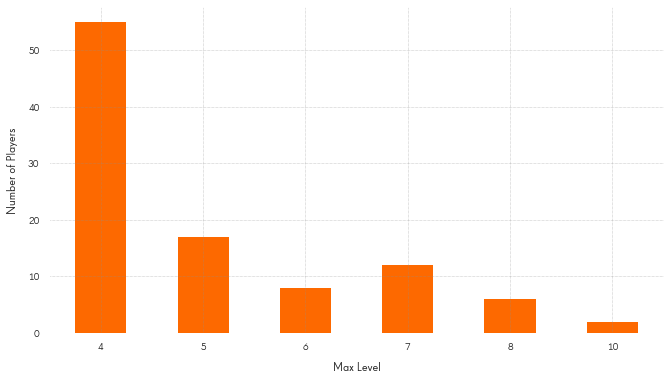

In [291]:
progress = pd.DataFrame(progression(pass_rates, num_game_rounds, num_players), columns=['max_level'])

#This line creates the plot
progress.groupby('max_level')['max_level'].count().plot(kind='bar')

#These lines change the axis labels and improve readability of the xtick labels
plt.xlabel('Max Level')
plt.xticks(rotation=0)
plt.ylabel('Number of Players')

What does this tell you about how players progress through the game? Are there any levels where players seem to get stuck and fail to progress? Do most of the players get through all 10 levels in 10 game rounds? Both of these could produce a negative experience for the player.

Try changing the pass rates in levels_pass_rates, or num_game_rounds to see how that affects progression. What pass rates for each level would you recommend?